In [1]:
!pip3 install requests beautifulsoup4
import requests
from bs4 import BeautifulSoup as bs4
import pandas as pd
import toolz
import matplotlib.pyplot as plt
import numpy as np

#Web Scrape data from MyAnimeList.net's top 150 voice actors/actresses using Beautiful Soup
#Rating is measured by number of people who have "Favorited" that voice actor/actress. 
#Final data is stored in a pandas dataframe called seiyuu_table_final

url = 'https://myanimelist.net/people.php'

seiyuu_data = requests.get(url)

soup = bs4(seiyuu_data.content,'html.parser')
table = soup.find('table')

#each page has 50 entries, so we will repeat the process 3 times for 3*50 = 150 table entries
seiyuu_table = pd.DataFrame(columns = ['rank', 'name', 'birthday','favorites'], index = range(0,50))
row_marker = 0
for row in table.find_all('tr'):
    column_marker = 0
    columns = row.find_all('td')
    row_marker += 1
    for column in columns:
        if (row_marker > 1):
            seiyuu_table.iat[row_marker-2,column_marker] = column.get_text()
            column_marker += 1
seiyuu_table['rank'] = seiyuu_table['rank'].str.replace('\n','')
seiyuu_table['name'] = seiyuu_table['name'].str.replace('\n','')
seiyuu_table['birthday'] = seiyuu_table['birthday'].str.replace('\n','')
seiyuu_table['favorites'] = seiyuu_table['favorites'].str.replace('\n','')


#Entries 51-100 on MyAnimeList
url2 = 'https://myanimelist.net/people.php?limit=50'
seiyuu_data = requests.get(url2)
soup = bs4(seiyuu_data.content,'html.parser')
table = soup.find('table')

seiyuu_table2 = pd.DataFrame(columns = ['rank', 'name', 'birthday','favorites'], index = range(0,50))
row_marker = 0
for row in table.find_all('tr'):
    column_marker = 0
    columns = row.find_all('td')
    row_marker += 1
    for column in columns:
        if (row_marker > 1):
            seiyuu_table2.iat[row_marker-2,column_marker] = column.get_text()
            column_marker += 1
seiyuu_table2['rank'] = seiyuu_table2['rank'].str.replace('\n','')
seiyuu_table2['name'] = seiyuu_table2['name'].str.replace('\n','')
seiyuu_table2['birthday'] = seiyuu_table2['birthday'].str.replace('\n','')
seiyuu_table2['favorites'] = seiyuu_table2['favorites'].str.replace('\n','')


#Entries 101-150 on MyAnimeList
url3 = 'https://myanimelist.net/people.php?limit=100'
seiyuu_data = requests.get(url3)
soup = bs4(seiyuu_data.content,'html.parser')
table = soup.find('table')

seiyuu_table3 = pd.DataFrame(columns = ['rank', 'name', 'birthday','favorites'], index = range(0,50))
row_marker = 0
for row in table.find_all('tr'):
    column_marker = 0
    columns = row.find_all('td')
    row_marker += 1
    for column in columns:
        if (row_marker > 1):
            seiyuu_table3.iat[row_marker-2,column_marker] = column.get_text()
            column_marker += 1
seiyuu_table3['rank'] = seiyuu_table3['rank'].str.replace('\n','')
seiyuu_table3['name'] = seiyuu_table3['name'].str.replace('\n','')
seiyuu_table3['birthday'] = seiyuu_table3['birthday'].str.replace('\n','')
seiyuu_table3['favorites'] = seiyuu_table3['favorites'].str.replace('\n','')


#Merge the data from all 3 pages from MyAnimeList
seiyuu_table_final = pd.concat([seiyuu_table,seiyuu_table2, seiyuu_table3])

#Remove the Japanese text to preserve English text in the form "LastName, FirstName"
series = pd.Series(seiyuu_table_final['name'])
seiyuu_table_final['name'] = series.str.extract(pat = ('([A-z]+, [A-z]+)'))

seiyuu_table_final

,rank,name,birthday,favorites
0,1,"Kamiya, Hiroshi","Jan 28, 1975","102,012"
1,2,"Hanazawa, Kana","Feb 25, 1989","98,143"
2,3,"Miyano, Mamoru","Jun 8, 1983","85,030"
3,4,"Kaji, Yuuki","Sep 3, 1985","70,286"
4,5,"Miyazaki, Hayao","Jan 5, 1941","66,125"
...,...,...,...,...
45,146,"Koyama, Rikiya","Dec 18, 1963","4,113"
46,147,"Furukawa, Makoto","Sep 29, 1989","4,060"
47,148,"Penkin, Kevin","May 22, 1992","4,039"
48,149,"Morikawa, Toshiyuki","Jan 26, 1967","4,028"


In [2]:
#Web Scrape Japanese voice acting cast data for Genshin Impact Characters
url4 = 'https://gamewith.net/genshin-impact/article/show/22638'
genshin_seiyuu_data = requests.get(url4)
soup = bs4(genshin_seiyuu_data.content, 'html.parser')
table = soup.find('table')
table

genshin_seiyuu_table = pd.DataFrame(columns = ['Character', 'Seiyuu'], index = range(0,27))
row_marker = 0
for row in table.find_all('tr'):
    column_marker = 0
    columns = row.find_all('td')
    row_marker += 1
    for column in columns:
        if (row_marker > 1):
            genshin_seiyuu_table.iat[row_marker-2,column_marker] = column.get_text()
            column_marker += 1

seiyuu_dict = {'Character':['Hu Tao', 'Eula', 'Albedo', 'Arataki Itto', 'Shenhe', 'Xiao', 'Zhongli', 'Ganyu', 'Yae Miko', 'Raiden Shogun', 
                  'Sangonomiya Kokomi', 'Kamisato Ayato', 'Venti', 'Kamisato Ayaka', 'Yelan'], 'Seiyuu': ['', '', '', '', '', '', '', '', '', '', '', '', '', '', ''], 
               '#MAL Favorites'  :['', '', '', '', '', '', '', '', '', '', '', '', '', '', '']}
seiyuu_df = pd.DataFrame(seiyuu_dict)

series = pd.Series(genshin_seiyuu_table['Seiyuu'])
genshin_seiyuu_table['Seiyuu'] = series.str.extract(pat = ('(JP: [A-z]+ [A-z]+)'))
genshin_seiyuu_table['Seiyuu'] = genshin_seiyuu_table['Seiyuu'].str.replace('JP: ', '')
genshin_seiyuu_table['Seiyuu'] = genshin_seiyuu_table['Seiyuu'].str.replace(' ', ', ')

#Format the voice actor/actress names to LastName, FirstName
for index, vas in genshin_seiyuu_table.iterrows():
    if vas['Character'] == 'Hu Tao':
        seiyuu_df.loc[0, 'Seiyuu'] = vas['Seiyuu']
    if vas['Character'] == 'Eula':
        seiyuu_df.loc[1,'Seiyuu'] = 'Satou, Rina'
    if vas['Character'] == 'Albedo':
        seiyuu_df.loc[2,'Seiyuu'] = 'Nojima, Kenji'
    if vas['Character'] == 'Itto':
        seiyuu_df.loc[3,'Seiyuu'] = vas['Seiyuu']
    if vas['Character'] == 'Shenhe':
        seiyuu_df.loc[4,'Seiyuu'] = vas['Seiyuu']
    if vas['Character'] == 'Xiao':
        seiyuu_df.loc[5,'Seiyuu'] = 'Matsuoka, Yoshitsugu'
    if vas['Character'] == 'Zhongli':
        seiyuu_df.loc[6,'Seiyuu'] = 'Maeno, Tomoaki'
    if vas['Character'] == 'Ganyu':
        seiyuu_df.loc[7,'Seiyuu'] = vas['Seiyuu']
    if vas['Character'] == 'Yae Miko':
        seiyuu_df.loc[8,'Seiyuu'] = 'Sakura, Ayane'
    if vas['Character'] == 'Raiden Shogun':
        seiyuu_df.loc[9, 'Seiyuu'] = 'Sawashiro, Miyuki'
    if vas['Character'] == 'Kokomi':
        seiyuu_df.loc[10, 'Seiyuu'] = 'Mimori, Suzuko' 
    if vas['Character'] == 'Ayato':
        seiyuu_df.loc[11, 'Seiyuu'] = vas['Seiyuu']
    if vas['Character'] == 'Venti':
        seiyuu_df.loc[12, 'Seiyuu'] = vas['Seiyuu']
    if vas['Character'] == 'Ayaka':
        seiyuu_df.loc[13, 'Seiyuu'] = vas['Seiyuu']
        
seiyuu_df.loc[14, 'Seiyuu'] = 'Sakamoto, Maaya'
    
seiyuu_df

,Character,Seiyuu,#MAL Favorites
0,Hu Tao,"Takahashi, Rie",
1,Eula,"Satou, Rina",
2,Albedo,"Nojima, Kenji",
3,Arataki Itto,"Nishikawa, Takanori",
4,Shenhe,"Kawasumi, Ayako",
5,Xiao,"Matsuoka, Yoshitsugu",
6,Zhongli,"Maeno, Tomoaki",
7,Ganyu,"Ueda, Reina",
8,Yae Miko,"Sakura, Ayane",
9,Raiden Shogun,"Sawashiro, Miyuki",


In [3]:
# Now we will fill in the MAL Favorites Data (some are manual) 
# and create a new column to indicate whether a character's seiyuu is in the MyAnimeList Top 150 or not 

In [3]:
seiyuu_df['MAL Top 150'] = False
for index, rows in seiyuu_table_final.iterrows():
    if(rows[1] == 'Takahashi, Rie'):
        seiyuu_df.loc[0, '#MAL Favorites'] = rows[3]
        seiyuu_df.loc[0, 'MAL Top 150'] = True
    elif (rows[1] == 'Sawashiro, Miyuki'):
        seiyuu_df.loc[9, '#MAL Favorites'] = rows[3]
        seiyuu_df.loc[9, 'MAL Top 150'] = True
    elif(rows[1] == 'Matsuoka, Yoshitsugu'):
        seiyuu_df.loc[5,'#MAL Favorites'] = rows[3]
        seiyuu_df.loc[5, 'MAL Top 150'] = True
    elif(rows[1] == 'Sakura, Ayane'): 
        seiyuu_df.loc[8,'#MAL Favorites'] = rows[3]
        seiyuu_df.loc[8, 'MAL Top 150'] = True
    elif(rows[1] == 'Maeno, Tomoaki'): 
        seiyuu_df.loc[6,'#MAL Favorites'] = rows[3]
        seiyuu_df.loc[6, 'MAL Top 150'] = True
    elif(rows[1] == 'Sato, Rina'): 
        seiyuu_df.loc[1,'#MAL Favorites'] = rows[3]
        seiyuu_df.loc[1, 'MAL Top 150'] = True
    elif(rows[1] == 'Nojima, Kenji'): 
        seiyuu_df.loc[2,'#MAL Favorites'] = rows[3]
        seiyuu_df.loc[2, 'MAL Top 150'] = True
    elif(rows[1] == 'Nishikawa, Takanori'): 
        seiyuu_df.loc[3,'#MAL Favorites'] = rows[3]
        seiyuu_df.loc[3, 'MAL Top 150'] = True
    elif(rows[1] == 'Kawasumi, Ayako'): 
        seiyuu_df.loc[4,'#MAL Favorites'] = rows[3]
        seiyuu_df.loc[4, 'MAL Top 150'] = True
    elif(rows[1] == 'Ueda, Reina'): 
        seiyuu_df.loc[7,'#MAL Favorites'] = rows[3]
        seiyuu_df.loc[7, 'MAL Top 150'] = True
    elif(rows[1] == 'Mimori, Suzuko'): 
        seiyuu_df.loc[10,'#MAL Favorites'] = rows[3]
        seiyuu_df.loc[10, 'MAL Top 150'] = True
    elif(rows[1] == 'Ishida, Akira'): 
        seiyuu_df.loc[11,'#MAL Favorites'] = rows[3]
        seiyuu_df.loc[11, 'MAL Top 150'] = True
    elif(rows[1] == 'Ayumu, Murase'): 
        seiyuu_df.loc[12,'#MAL Favorites'] = rows[3]
        seiyuu_df.loc[12, 'MAL Top 150'] = True
    elif(rows[1] == 'Hayami, Saori'): 
        seiyuu_df.loc[13,'#MAL Favorites'] = rows[3]
        seiyuu_df.loc[13, 'MAL Top 150'] = True
    elif(rows[1] == 'Sakamoto, Maaya'): 
        seiyuu_df.loc[14,'#MAL Favorites'] = rows[3]
        seiyuu_df.loc[14, 'MAL Top 150'] = True
        
#Fill in missing data for #MAL favorites on those who are not in the Top 150 
seiyuu_df.loc[1,'#MAL Favorites'] = '2,670'
seiyuu_df.loc[7,'#MAL Favorites'] = '3417'
seiyuu_df.loc[2,'#MAL Favorites'] = '965'
seiyuu_df.loc[3,'#MAL Favorites'] = '593' #This is from T.M Revolution which is the only data available about Takanori Nishikawa on MyAnimeList
seiyuu_df.loc[6,'#MAL Favorites'] = '3,662'
seiyuu_df.loc[10,'#MAL Favorites'] = '3,203'
seiyuu_df.loc[12,'#MAL Favorites'] = '5,262'




seiyuu_df

,Character,Seiyuu,#MAL Favorites,MAL Top 150
0,Hu Tao,"Takahashi, Rie","45,054",True
1,Eula,"Satou, Rina","2,670",False
2,Albedo,"Nojima, Kenji",965,False
3,Arataki Itto,"Nishikawa, Takanori",593,False
4,Shenhe,"Kawasumi, Ayako","4,470",True
5,Xiao,"Matsuoka, Yoshitsugu","37,623",True
6,Zhongli,"Maeno, Tomoaki","3,662",False
7,Ganyu,"Ueda, Reina",3417,False
8,Yae Miko,"Sakura, Ayane","17,140",True
9,Raiden Shogun,"Sawashiro, Miyuki","37,906",True


In [4]:
# Genshin Sales Data from Japan and China

# Japan Data will be manually added from https://game-i.daa.jp/?%E3%82%AC%E3%83%81%E3%83%A3%E5%88%86%E6%9E%90%2F%E5%8E%9F%E7%A5%9E 
# Formatting the data via web scraping is difficult due to inaccurate English translations. 
# Data in this website represents in billions of yen. For example, 22.71 G is 2.271 billion Yen (due to Japanese language) 

# NOTE: This is data for iOS sales only. We are currently unable to access data for PS4,PS5 and PC sales since the company does not disclose
#        this data. 

sales_JP = {} 
# Sales in billions of yen.
sales_JP['TheHeron\'s Court'] = 2.271
sales_JP['Azure Excursion + Ballad in Goblets'] = 3.201
sales_JP['Reign of Serenity + Drifting Luminescence'] = 2.027
sales_JP['Everbloom Violet'] = 1.733
sales_JP['Gentry of Hermitage + Adrift in the Harbor'] = 2.394
sales_JP['Invitation to Mundane Life + The Transcendant One Returns'] = 2.347
sales_JP['Oni\'s Royale'] = 1.071
sales_JP[' Secretum Secretorum + Born of Ocean Swell'] = 1.667
sales_JP['Moment of Bloom'] = 2.468

# ----------------------------------------------
def f(yen):
    Yen_to_1USD = 0.0077 #As of 5/15/2022 
    # we account for the fact that each entry is a certain billion amount of yen by multiplying by 10^9
    return int(Yen_to_1USD * (yen * (1000000000)))

#We convert our sales from Japanese Yen to US Dollar for the sake of consistency
sales_JP = toolz.valmap(f,sales_JP)
print('Japan')
sales_JP = pd.DataFrame(sales_JP.items(), columns = ['Banner','Sales Japan (in USD)'])
sales_JP

Japan


,Banner,Sales Japan (in USD)
0,TheHeron's Court,17486700
1,Azure Excursion + Ballad in Goblets,24647700
2,Reign of Serenity + Drifting Luminescence,15607900
3,Everbloom Violet,13344100
4,Gentry of Hermitage + Adrift in the Harbor,18433800
5,Invitation to Mundane Life + The Transcendant ...,18071900
6,Oni's Royale,8246700
7,Secretum Secretorum + Born of Ocean Swell,12835900
8,Moment of Bloom,19003600


In [5]:
# China Data will be manually added from https://www.genshinlab.com/genshin-impact-revenue-chart/
# This site is most commonly referred to when gauging character sales and is regularly maintained 
# by certified people across the Genshin community.

#This data from China is on iOS only. 

sales_CN = {} 
# Sales in USD as of 5/15/2022
sales_CN['The Heron\'s Court'] = 19897071
sales_CN['Azure Excursion + Ballad in Goblets'] = 22767455
sales_CN['Reign of Serenity + Drifting Luminescence'] = 33560259
sales_CN['Everbloom Violet'] = 15110264
sales_CN['Gentry of Hermitage + Adrift in the Harbor'] = 26780298
sales_CN['Invitation to Mundane Life + The Transcendant One Returns'] = 16994406
sales_CN['Oni\'s Royale'] = 13404072
sales_CN[' Secretum Secretorum + Born of Ocean Swell'] = 17026066
sales_CN['Moment of Bloom'] = 25226952

sales_CN = pd.DataFrame(sales_CN.items(), columns = ['Banner','Sales China iOS (in USD)'])
print('China')
sales_CN

China


,Banner,Sales China iOS (in USD)
0,The Heron's Court,19897071
1,Azure Excursion + Ballad in Goblets,22767455
2,Reign of Serenity + Drifting Luminescence,33560259
3,Everbloom Violet,15110264
4,Gentry of Hermitage + Adrift in the Harbor,26780298
5,Invitation to Mundane Life + The Transcendant ...,16994406
6,Oni's Royale,13404072
7,Secretum Secretorum + Born of Ocean Swell,17026066
8,Moment of Bloom,25226952


In [6]:
# Now we are going to make plots for Japan and China sales data versus the MyAnimeList favorite rating for their seiyuus. 
# Double banners will have the voice actors' favorites summed together. 
# For example: Azure Excursion + Ballad in Goblets would have Akira Ishida and Ayumu Murase's favorite ratings summed together on the x axis.
# Sales will always be on the y axis

plot_data = pd.DataFrame(columns = ['Banner', '#Seiyuu Favorites'], index = range(0,9))

plot_data['Banner'] = sales_CN['Banner']

plot_data['Characters'] = ['Kamisato Ayaka', 'Kamisato Ayato + Venti', 'Raiden Shogun + Sangonomiya Kokomi', 'Yae Miko','Zhongli + Ganyu', 
                          'Xiao + Shenhe', 'Arataki Itto', 'Albedo + Eula', 'Hu Tao']
seiyuu_df['#MAL Favorites'] = seiyuu_df['#MAL Favorites'].str.replace(',','')
#print(seiyuu_df)
plot_data.loc[0,'#Seiyuu Favorites'] = int(seiyuu_df.loc[13,'#MAL Favorites'])
plot_data.loc[1,'#Seiyuu Favorites'] = int(seiyuu_df.loc[11,'#MAL Favorites']) + int(seiyuu_df.loc[12,'#MAL Favorites'])
plot_data.loc[2,'#Seiyuu Favorites'] = int(seiyuu_df.loc[9,'#MAL Favorites']) + int(seiyuu_df.loc[10,'#MAL Favorites'])
plot_data.loc[3,'#Seiyuu Favorites'] = int(seiyuu_df.loc[8,'#MAL Favorites'])
plot_data.loc[4,'#Seiyuu Favorites'] = int(seiyuu_df.loc[6,'#MAL Favorites']) + int(seiyuu_df.loc[7,"#MAL Favorites"])
plot_data.loc[5,'#Seiyuu Favorites'] = int(seiyuu_df.loc[5,'#MAL Favorites']) + int(seiyuu_df.loc[4,'#MAL Favorites'])
plot_data.loc[6,'#Seiyuu Favorites'] = int(seiyuu_df.loc[3,'#MAL Favorites'])
plot_data.loc[7,'#Seiyuu Favorites'] = int(seiyuu_df.loc[1,'#MAL Favorites']) + int(seiyuu_df.loc[2,'#MAL Favorites'])
plot_data.loc[8,'#Seiyuu Favorites'] = int(seiyuu_df.loc[0,'#MAL Favorites']) 

plot_data['Japan Sales in USD'] = sales_JP['Sales Japan (in USD)'] 
plot_data['China Sales in USD'] = sales_CN['Sales China iOS (in USD)']
#print(plot_data)

# Keep a column of combined iOS sales in Japan and China
plot_data['China and Japan Combined Sales'] = 0
for index, row in plot_data.iterrows():
    plot_data.loc[index,'China and Japan Combined Sales'] += row[3] + row[4]

plot_data

,Banner,#Seiyuu Favorites,Characters,Japan Sales in USD,China Sales in USD,China and Japan Combined Sales
0,The Heron's Court,53524,Kamisato Ayaka,17486700,19897071,37383771
1,Azure Excursion + Ballad in Goblets,16585,Kamisato Ayato + Venti,24647700,22767455,47415155
2,Reign of Serenity + Drifting Luminescence,41109,Raiden Shogun + Sangonomiya Kokomi,15607900,33560259,49168159
3,Everbloom Violet,17140,Yae Miko,13344100,15110264,28454364
4,Gentry of Hermitage + Adrift in the Harbor,7079,Zhongli + Ganyu,18433800,26780298,45214098
5,Invitation to Mundane Life + The Transcendant ...,42093,Xiao + Shenhe,18071900,16994406,35066306
6,Oni's Royale,593,Arataki Itto,8246700,13404072,21650772
7,Secretum Secretorum + Born of Ocean Swell,3635,Albedo + Eula,12835900,17026066,29861966
8,Moment of Bloom,45054,Hu Tao,19003600,25226952,44230552


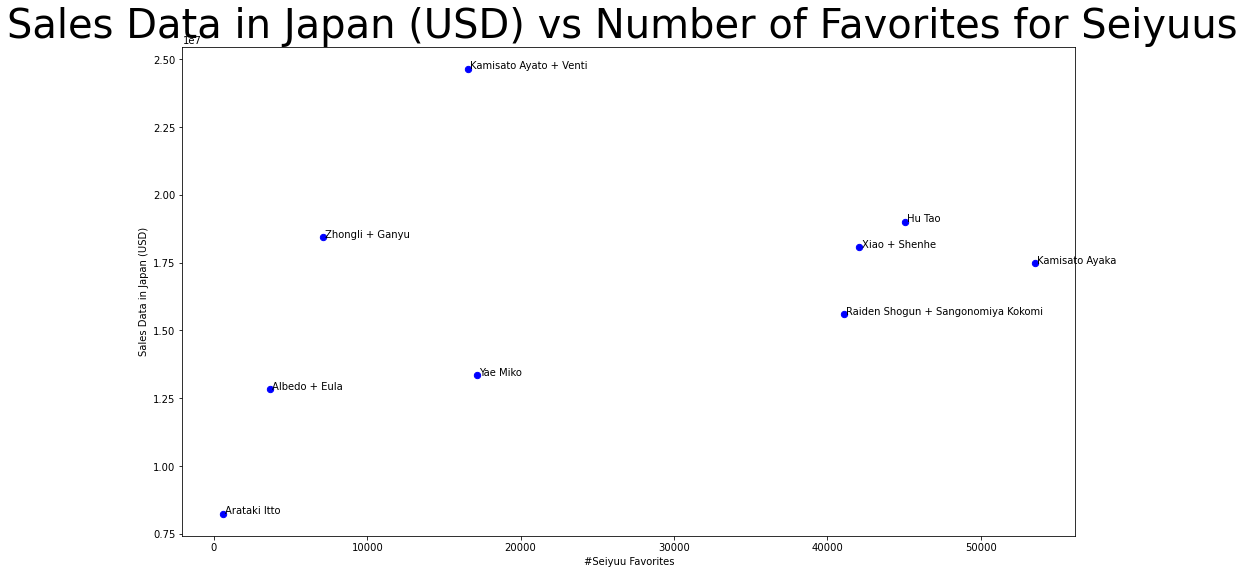

In [7]:
annotations = plot_data['Characters'].to_numpy() 
X_Plots = plot_data['#Seiyuu Favorites'].to_numpy()
Y_Plots =  plot_data['Japan Sales in USD'].to_numpy()
plt.figure(figsize = (16,9))
plt.scatter(X_Plots,Y_Plots, s = 40, color = "blue")
plt.xlabel("#Seiyuu Favorites")
plt.ylabel("Sales Data in Japan (USD)")
plt.title("Sales Data in Japan (USD) vs Number of Favorites for Seiyuus ",fontsize=40)
for i, label in enumerate(annotations):
    plt.annotate(label, xy = (X_Plots[i], Y_Plots[i]), xytext = (X_Plots[i] + 140 , Y_Plots[i] + 140) , ha = 'left') 
plt.show()

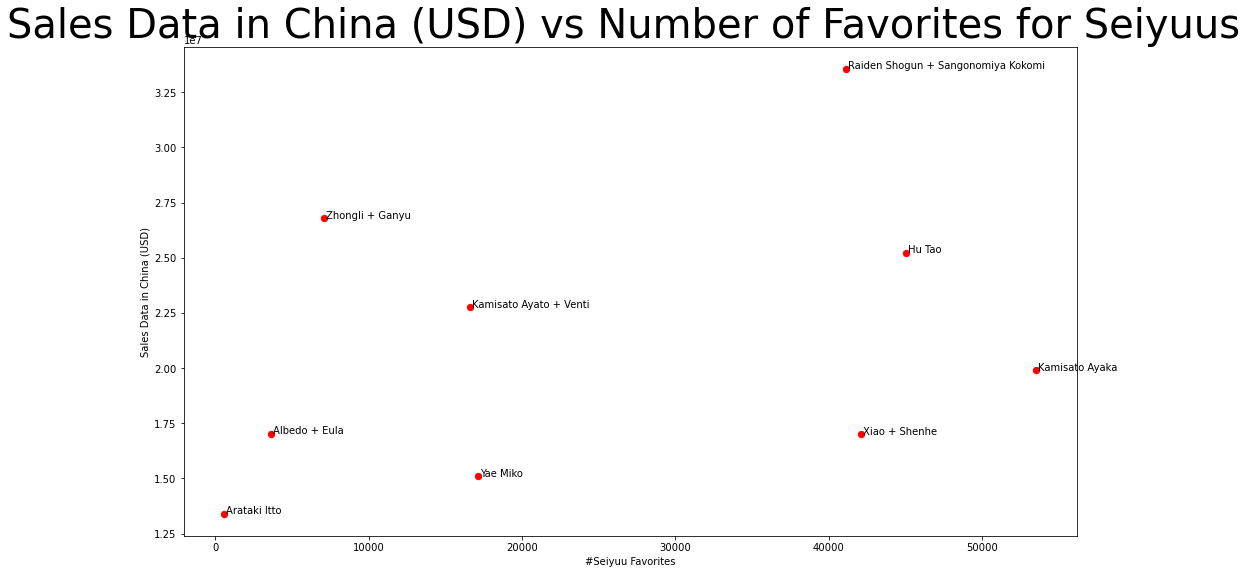

In [8]:
annotations = plot_data['Characters'].to_numpy() 
X_Plots = plot_data['#Seiyuu Favorites'].to_numpy()
Y_Plots =  plot_data['China Sales in USD'].to_numpy()
plt.figure(figsize = (16,9))
plt.scatter(X_Plots,Y_Plots, s = 40, color = "red")
plt.xlabel("#Seiyuu Favorites")
plt.ylabel("Sales Data in China (USD)")
plt.title("Sales Data in China (USD) vs Number of Favorites for Seiyuus ",fontsize=40)
for i, label in enumerate(annotations):
    plt.annotate(label, xy = (X_Plots[i], Y_Plots[i]), xytext = (X_Plots[i] + 140 , Y_Plots[i] + 140) , ha = 'left') 
plt.show()

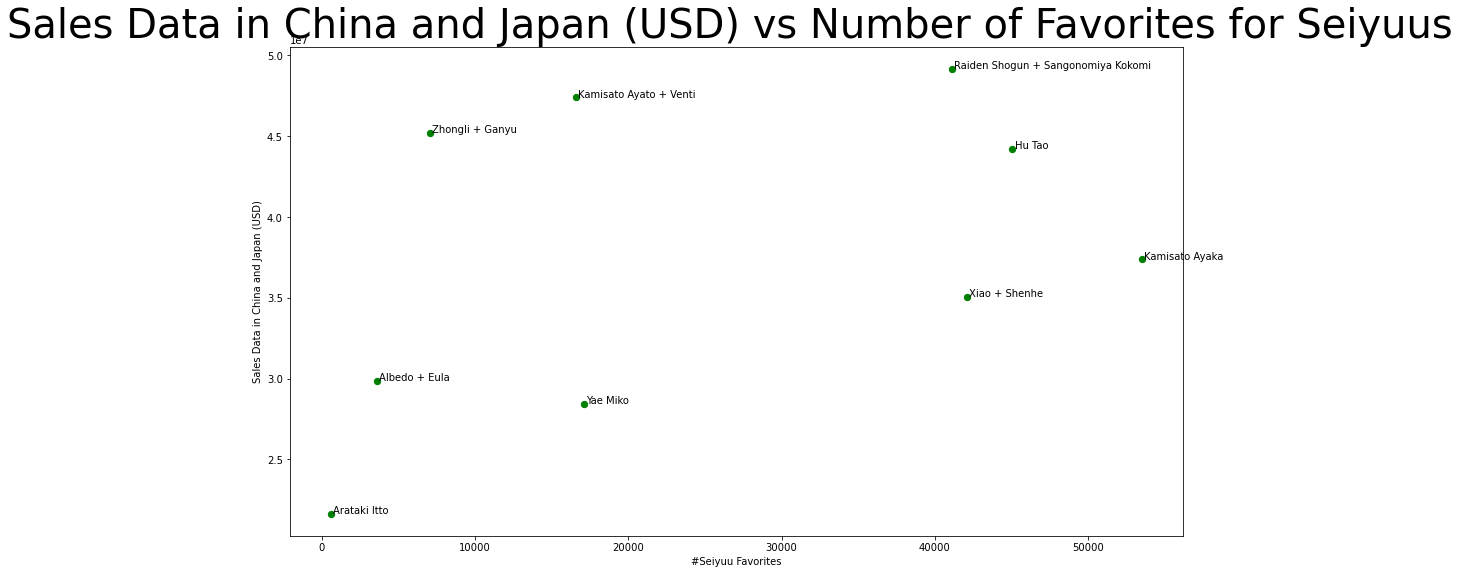

In [9]:
annotations = plot_data['Characters'].to_numpy() 
X_Plots = plot_data['#Seiyuu Favorites'].to_numpy()
Y_Plots =  plot_data['China and Japan Combined Sales'].to_numpy()
plt.figure(figsize = (16,9))
plt.scatter(X_Plots,Y_Plots, s = 40, color = "green")
plt.xlabel("#Seiyuu Favorites")
plt.ylabel("Sales Data in China and Japan (USD)")
plt.title("Sales Data in China and Japan (USD) vs Number of Favorites for Seiyuus ",fontsize=40)
for i, label in enumerate(annotations):
    plt.annotate(label, xy = (X_Plots[i], Y_Plots[i]), xytext = (X_Plots[i] + 140 , Y_Plots[i] + 140) , ha = 'left') 
plt.show()

In [10]:
import pandas as pd


d1 = pd.read_excel('paimonmoe_wish_history.xlsx')
data1 = pd.DataFrame(d1, columns=['Type', 'Name', 'Time', '⭐', 'Pity', '#Roll', 'Group', 'Banner'])
d2 = pd.read_excel('paimonmoe_wish_history1.xlsx')
data2 = pd.DataFrame(d2, columns=['Type', 'Name', 'Time', '⭐', 'Pity', '#Roll', 'Group', 'Banner'])
d3 = pd.read_excel('paimonmoe_wish_history2.xlsx')
data3 = pd.DataFrame(d3, columns=['Type', 'Name', 'Time', '⭐', 'Pity', '#Roll', 'Group', 'Banner'])
d4 = pd.read_excel('paimonmoe_wish_history3.xlsx')
data4 = pd.DataFrame(d4, columns=['Type', 'Name', 'Time', '⭐', 'Pity', '#Roll', 'Group', 'Banner'])
d5 = pd.read_excel('paimonmoe_wish_history4.xlsx')
data5 = pd.DataFrame(d5, columns=['Type', 'Name', 'Time', '⭐', 'Pity', '#Roll', 'Group', 'Banner'])
d6 = pd.read_excel('paimonmoe_wish_history5.xlsx')
data6 = pd.DataFrame(d6, columns=['Type', 'Name', 'Time', '⭐', 'Pity', '#Roll', 'Group', 'Banner'])
d7 = pd.read_excel('paimonmoe_wish_history6.xlsx')
data7 = pd.DataFrame(d7, columns=['Type', 'Name', 'Time', '⭐', 'Pity', '#Roll', 'Group', 'Banner'])
d8 = pd.read_excel('paimonmoe_wish_history7.xlsx')
data8 = pd.DataFrame(d8, columns=['Type', 'Name', 'Time', '⭐', 'Pity', '#Roll', 'Group', 'Banner'])
d9 = pd.read_excel('paimonmoe_wish_history8.xlsx')
data9 = pd.DataFrame(d9, columns=['Type', 'Name', 'Time', '⭐', 'Pity', '#Roll', 'Group', 'Banner'])
d10 = pd.read_excel('paimonmoe_wish_history9.xlsx')
data10 = pd.DataFrame(d10, columns=['Type', 'Name', 'Time', '⭐', 'Pity', '#Roll', 'Group', 'Banner'])
d11 = pd.read_excel('paimonmoe_wish_history10.xlsx')
data11 = pd.DataFrame(d11, columns=['Type', 'Name', 'Time', '⭐', 'Pity', '#Roll', 'Group', 'Banner'])
dataset = pd.concat([data1, data2, data3, data4, data5, data6, data7, data8, data9, data10, data11])
dataset = dataset.loc[dataset['Time'] > '2021-11-02 00:00:00']
dataset = dataset.drop(['Group'], axis = 1)

dataset

,Type,Name,Time,⭐,Pity,#Roll,Banner
0,Weapon,Ferrous Shadow,2021-11-12 12:15:27,3,1,1,Moment of Bloom
1,Character,Sayu,2021-11-16 12:06:50,4,2,2,Moment of Bloom
2,Weapon,Emerald Orb,2021-11-16 12:47:55,3,1,3,Moment of Bloom
3,Weapon,Debate Club,2021-11-16 12:57:23,3,1,4,Moment of Bloom
4,Weapon,Ferrous Shadow,2021-11-16 13:13:06,3,1,5,Moment of Bloom
...,...,...,...,...,...,...,...
790,Weapon,Skyrider Sword,2022-05-11 07:01:08,3,1,84,The Herons Court
791,Character,Razor,2022-05-11 07:01:14,4,5,85,The Herons Court
792,Weapon,Cool Steel,2022-05-11 07:01:54,3,1,86,The Herons Court
793,Weapon,Cool Steel,2022-05-12 12:06:43,3,1,87,The Herons Court


In [11]:
d = {'Character':['Hu Tao', 'Eula', 'Albedo', 'Arataki Itto', 'Shenhe', 'Xiao', 'Zhongli', 'Ganyu', 'Yae Miko', 'Raiden Shogun', 
                  'Sangonomiya Kokomi', 'Kamisato Ayato', 'Venti', 'Kamisato Ayaka'],
       'Banner':["Moment of Bloom", "Born of Ocean Swell", "Secretum Secretorum", "Oni's Royale", "The Transcendent One Returns", 
                 "Invitation to Mundane Life", "Gentry of Hermitage", "Adrift in the Harbor", "Everbloom Violet", "Reign of Serenity", 
                 "Drifting Luminescence", "Azure Excursion", "Ballad in Goblets", "The Herons Court"]}
key = pd.DataFrame(d)  
key

,Character,Banner
0,Hu Tao,Moment of Bloom
1,Eula,Born of Ocean Swell
2,Albedo,Secretum Secretorum
3,Arataki Itto,Oni's Royale
4,Shenhe,The Transcendent One Returns
5,Xiao,Invitation to Mundane Life
6,Zhongli,Gentry of Hermitage
7,Ganyu,Adrift in the Harbor
8,Yae Miko,Everbloom Violet
9,Raiden Shogun,Reign of Serenity


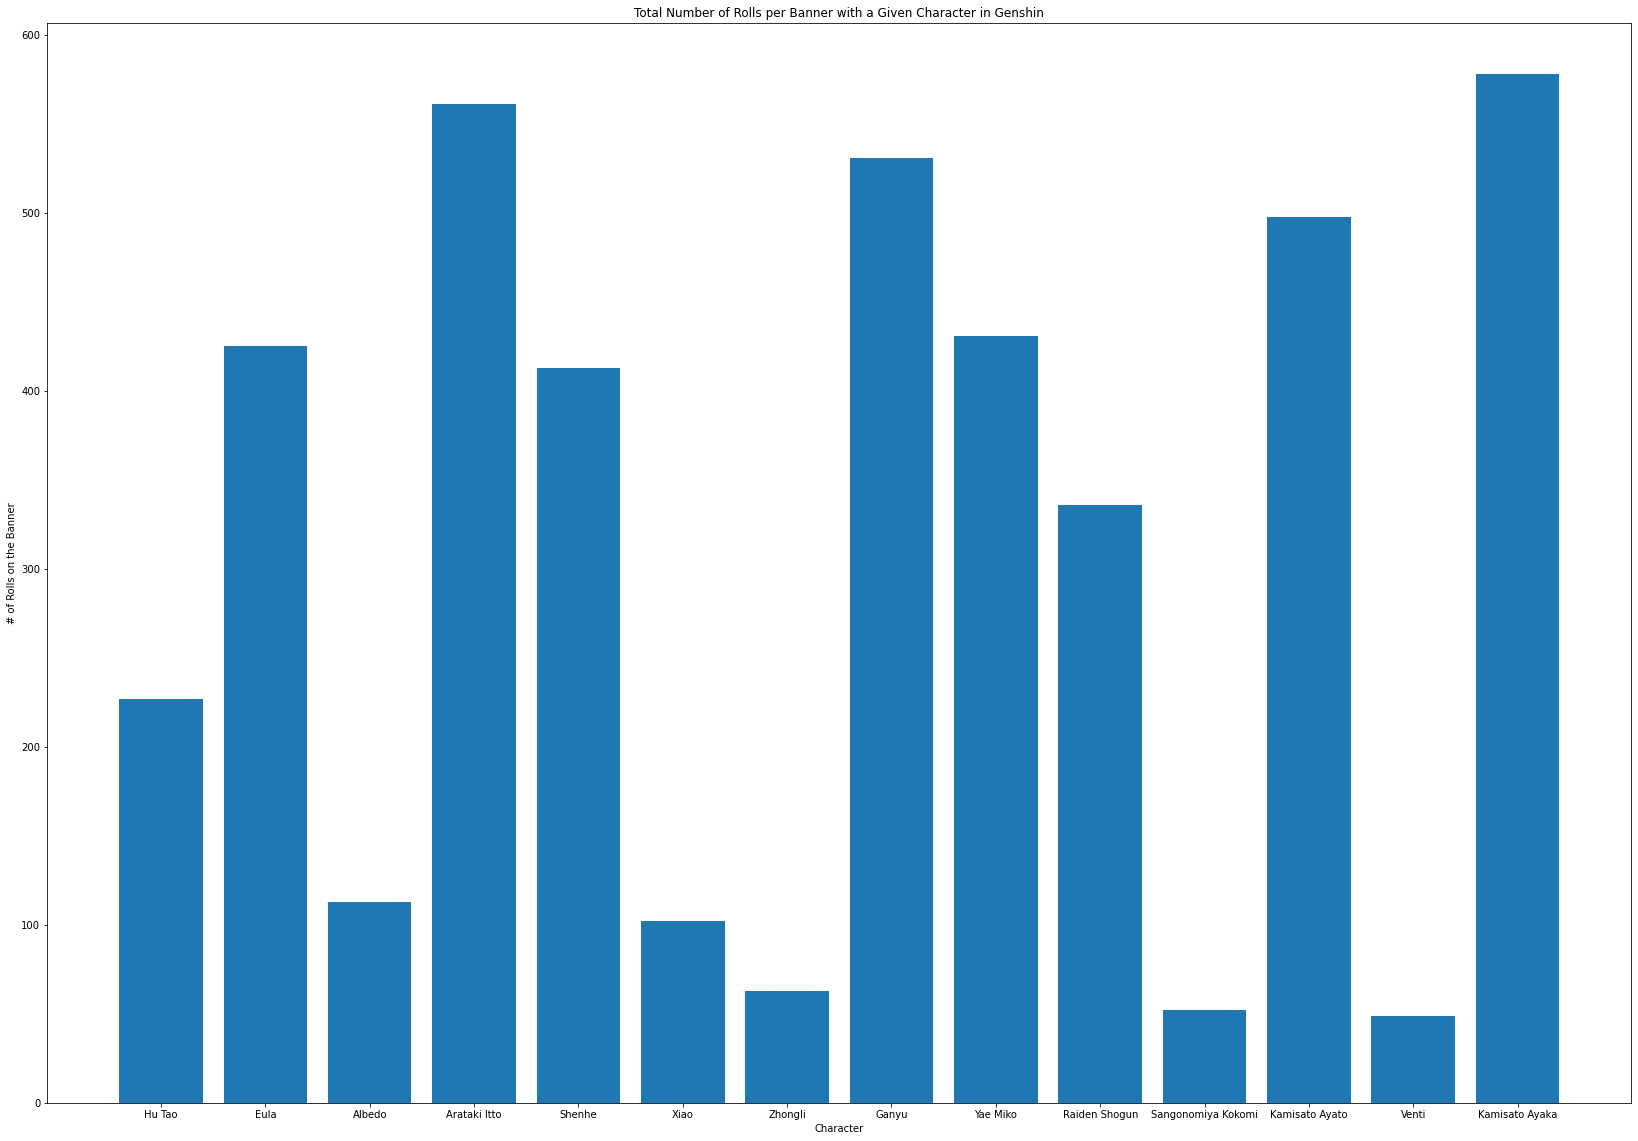

In [12]:
import matplotlib.pyplot as plt
counter = {}
for c in dataset['Banner']:
    if c not in counter:
        counter[c] = 0
    counter[c] += 1

fig = plt.figure(figsize=(22, 15))
ax = fig.add_axes([0,0,1,1])
characters = ['Hu Tao', 'Eula', 'Albedo', 'Arataki Itto', 'Shenhe', 'Xiao', 'Zhongli', 'Ganyu', 'Yae Miko', 'Raiden Shogun', 
                  'Sangonomiya Kokomi', 'Kamisato Ayato', 'Venti', 'Kamisato Ayaka']
count = [227, 425, 113, 561, 413, 102, 63, 531, 431, 336, 52, 498, 49, 578]
ax.bar(characters, count)
ax.set_ylabel('# of Rolls on the Banner')
ax.set_xlabel('Character')
ax.set_title('Total Number of Rolls per Banner with a Given Character in Genshin')
plt.show()

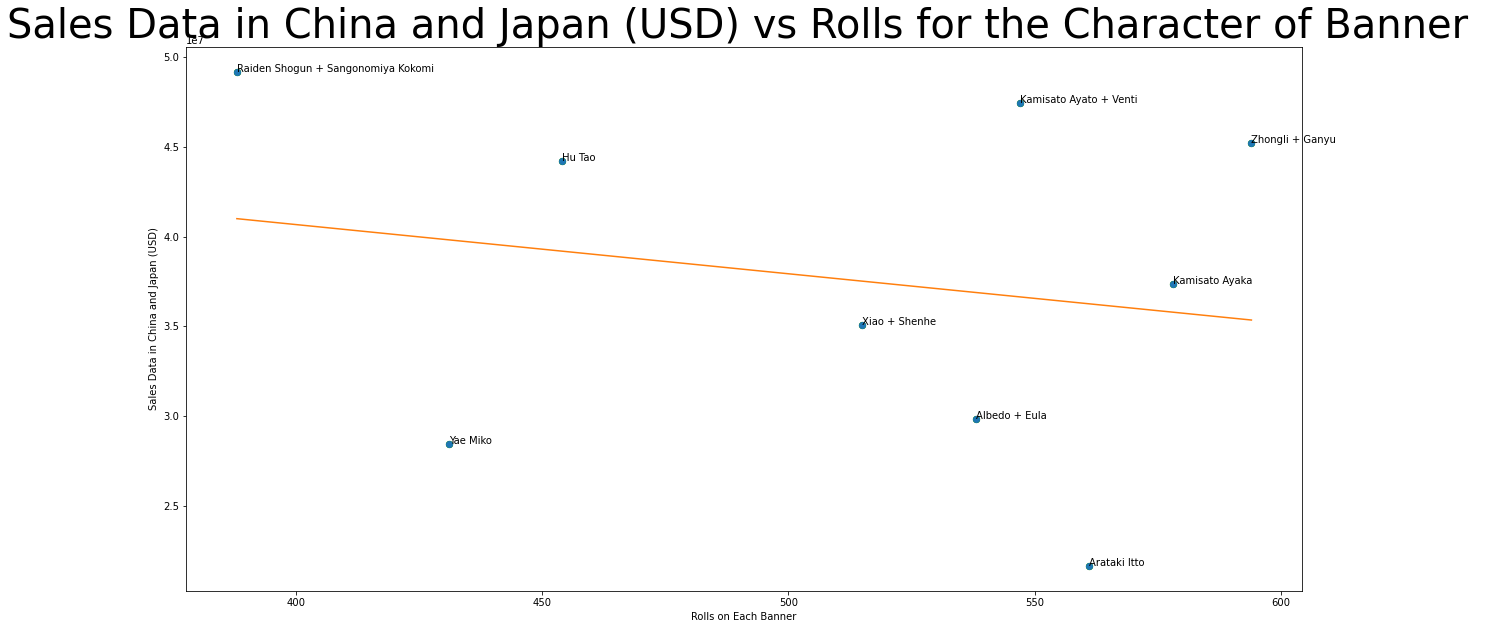

In [28]:
import statsmodels.api as sm

newcount = [578, 547, 388, 431, 594, 515, 561, 538, 454]
df = pd.DataFrame(newcount)
annotations = plot_data['Characters'].to_numpy()
X_Plots = df[0].to_numpy()
Y_Plots =  plot_data['China and Japan Combined Sales'].to_numpy()
z = np.polyfit(x = X_Plots, y = Y_Plots, deg=1)
f = np.poly1d(z)
x_new = np.linspace(X_Plots.min(), X_Plots.max(), 100)
y_new = f(x_new)
plt.figure(figsize = (20,10))
plt.plot(X_Plots, Y_Plots,'o',x_new,y_new)
plt.scatter(X_Plots,Y_Plots, s = 40, color = "green")

plt.xlabel("Rolls on Each Banner")
plt.ylabel("Sales Data in China and Japan (USD)")
plt.title("Sales Data in China and Japan (USD) vs Rolls for the Character of Banner ",fontsize=40)
for i, label in enumerate(annotations):
    plt.annotate(label, (X_Plots[i], Y_Plots[i]))
plt.show()

In [15]:
t = pd.read_excel('twitterdata.xlsx')
twitter = pd.DataFrame(t, columns = ['Character', 'Likes', 'Retweets', 'Post Activity'])
twitter['Post Activity'] = twitter['Likes'] + twitter['Retweets']
twitter

,Character,Likes,Retweets,Post Activity
0,Hu Tao,NaN,NaN,NaN
1,Eula,63503.0,6873.0,70376.0
2,Albedo,NaN,NaN,NaN
3,Arataki Itto,188590.0,34457.0,223047.0
4,Shenhe,207072.0,36283.0,243355.0
5,Xiao,NaN,NaN,NaN
6,Zhongli,NaN,NaN,NaN
7,Ganyu,NaN,NaN,NaN
8,Yae Miko,343000.0,73082.0,416082.0
9,Raiden Shogun,88703.0,14687.0,103390.0


In [16]:
t1 = pd.read_excel('Genshin_Form.xlsx')
form = pd.DataFrame(t1, columns = ['Did you wish for Hu Tao?', 'Why did you wish for Hu Tao?',
                                  'Did you wish for Eula?', 'Why did you wish for Eula?', 
                                  'Did you wish for Albedo?', 'Why did you wish for Albedo?',
                                   'Did you wish for Arataki Itto?', 'Why did you wish for Arataki Itto?',
                                   'Did you wish for Shenhe?', 'Why did you wish for Shenhe?', 
                                   'Did you wish for Xiao?', 'Why did you wish for Xiao?', 
                                   'Did you wish for Zhongli?', 'Why did you wish for Zhongli?',
                                   'Did you wish for Ganyu?', 'Why did you wish for Ganyu?',
                                   'Did you wish for Yae Miko?', 'Why did you wish for Yae Miko?',
                                   'Did you wish for Raiden Shogun?', 'Why did you wish for Raiden Shogun?',
                                   'Did you wish for Sangonomiya Kokomi?', 'Why did you wish for Sangonomiya Kokomi?',
                                   'Did you wish for Kamisato Ayato?', 'Why did you wish for Kamisato Ayato?',
                                   'Did you wish for Venti?', 'Why did you wish for Venti?', 
                                   'Did you wish for Kamisato Ayaka?', 'Why did you wish for Kamisato Ayaka?'])
form

,Did you wish for Hu Tao?,Why did you wish for Hu Tao?,Did you wish for Eula?,Why did you wish for Eula?,Did you wish for Albedo?,Why did you wish for Albedo?,Did you wish for Arataki Itto?,Why did you wish for Arataki Itto?,Did you wish for Shenhe?,Why did you wish for Shenhe?,...,Did you wish for Raiden Shogun?,Why did you wish for Raiden Shogun?,Did you wish for Sangonomiya Kokomi?,Why did you wish for Sangonomiya Kokomi?,Did you wish for Kamisato Ayato?,Why did you wish for Kamisato Ayato?,Did you wish for Venti?,Why did you wish for Venti?,Did you wish for Kamisato Ayaka?,Why did you wish for Kamisato Ayaka?
0,Yes,"Character Design, Voice Acting Cast",Yes,"Character Design, Gameplay",No,NaN,No,NaN,No,NaN,...,No,NaN,Yes,"Character Design, Gameplay, Voice Acting Cast",Yes,"Character Design, Gameplay, In-Game Lore, Voic...",Yes,Meta Relevance,Yes,"Character Design, Gameplay, Meta Relevance, In..."
1,Yes,"Character Design, Gameplay, Meta Relevance, Vo...",No,NaN,No,NaN,No,NaN,No,NaN,...,Yes,"Character Design, Meta Relevance",No,NaN,No,NaN,Yes,"Character Design, Gameplay, Meta Relevance",Yes,"Character Design, Gameplay"
2,Yes,"Gameplay, Meta Relevance",Yes,"Gameplay, Meta Relevance",No,NaN,No,NaN,Yes,"Character Design, Gameplay, Meta Relevance",...,Yes,"Character Design, Gameplay, Meta Relevance",Yes,"Character Design, Gameplay, Meta Relevance, In...",No,NaN,No,NaN,Yes,"Gameplay, Meta Relevance"
3,Yes,"Character Design, Gameplay, Voice Acting Cast",Yes,"Character Design, Gameplay",No,NaN,No,NaN,Yes,Character Design,...,Yes,"Character Design, Gameplay, Meta Relevance, In...",Yes,"Character Design, Gameplay, Meta Relevance, In...",No,NaN,No,NaN,No,NaN
4,Yes,"Character Design, Gameplay, Meta Relevance, In...",No,NaN,Yes,"Character Design, Gameplay, Meta Relevance, In...",No,NaN,No,NaN,...,Yes,"Character Design, Gameplay, Meta Relevance, In...",Yes,"Character Design, Gameplay, Meta Relevance, In...",No,NaN,Yes,In-Game Lore,Yes,"Character Design, Gameplay, Meta Relevance, In..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,Yes,"Gameplay, Voice Acting Cast",Yes,"Character Design, Gameplay, Voice Acting Cast",Yes,Gameplay,No,NaN,Yes,"Character Design, Gameplay, Voice Acting Cast",...,Yes,"Character Design, Gameplay, Meta Relevance, In...",Yes,"Gameplay, Meta Relevance",Yes,"Gameplay, In-Game Lore, Voice Acting Cast",Yes,"Gameplay, In-Game Lore",Yes,"Character Design, Gameplay, Meta Relevance, In..."
98,No,NaN,No,NaN,No,NaN,No,NaN,No,NaN,...,No,NaN,Yes,"Character Design, Gameplay, Meta Relevance, In...",No,NaN,No,NaN,Yes,Character Design
99,Yes,"Character Design, Gameplay, Meta Relevance, Vo...",No,NaN,No,NaN,Yes,"Character Design, Gameplay, Meta Relevance, In...",No,NaN,...,No,NaN,No,NaN,Yes,"Character Design, Gameplay",No,NaN,Yes,"Character Design, Gameplay, Meta Relevance, In..."
100,Yes,"Character Design, Gameplay, Meta Relevance, In...",No,NaN,No,NaN,No,NaN,Yes,"Character Design, Gameplay, In-Game Lore",...,Yes,"Character Design, Gameplay, Meta Relevance, In...",Yes,"Character Design, Gameplay, Meta Relevance",No,NaN,No,NaN,Yes,"Character Design, Gameplay, Meta Relevance, In..."


In [17]:
def Convert(lst):
    res_dct = {lst[i]: lst[i + 1] for i in range(0, len(lst), 2)}
    return res_dct

count = {}

In [18]:
counterHuTao = {'Yes': 0, 'No': 0, 'Character Design': 0, 'Gameplay': 0, 'Meta Relevance': 0,
                     'In-Game Lore': 0, 'Voice Acting Cast': 0}
for c in form['Did you wish for Hu Tao?']:
    counterHuTao[c] += 1
whyWish = form['Why did you wish for Hu Tao?']
whyWish = whyWish.dropna()
for c in whyWish:
    list = c.split(', ')
    for i in list:
        counterHuTao[i] += 1

counterEula = {'Yes': 0, 'No': 0, 'Character Design': 0, 'Gameplay': 0, 'Meta Relevance': 0,
                     'In-Game Lore': 0, 'Voice Acting Cast': 0}
for c in form['Did you wish for Eula?']:
    counterEula[c] += 1
whyWish = form['Why did you wish for Eula?']
whyWish = whyWish.dropna()
for c in whyWish:
    list = c.split(', ')
    for i in list:
        counterEula[i] += 1

counterAlbedo = {'Yes': 0, 'No': 0, 'Character Design': 0, 'Gameplay': 0, 'Meta Relevance': 0,
                     'In-Game Lore': 0, 'Voice Acting Cast': 0}
for c in form['Did you wish for Albedo?']:
    counterAlbedo[c] += 1
whyWish = form['Why did you wish for Albedo?']
whyWish = whyWish.dropna()
for c in whyWish:
    list = c.split(', ')
    for i in list:
        counterAlbedo[i] += 1
        
counterAratakiItto = {'Yes': 0, 'No': 0, 'Character Design': 0, 'Gameplay': 0, 'Meta Relevance': 0,
                     'In-Game Lore': 0, 'Voice Acting Cast': 0}
for c in form['Did you wish for Arataki Itto?']:
    counterAratakiItto[c] += 1
whyWish = form['Why did you wish for Arataki Itto?']
whyWish = whyWish.dropna()
for c in whyWish:
    list = c.split(', ')
    for i in list:
        counterAratakiItto[i] += 1

counterShenhe = {'Yes': 0, 'No': 0, 'Character Design': 0, 'Gameplay': 0, 'Meta Relevance': 0,
                     'In-Game Lore': 0, 'Voice Acting Cast': 0}
for c in form['Did you wish for Shenhe?']:
    counterShenhe[c] += 1
whyWish = form['Why did you wish for Shenhe?']
whyWish = whyWish.dropna()
for c in whyWish:
    list = c.split(', ')
    for i in list:
        counterShenhe[i] += 1

counterXiao = {'Yes': 0, 'No': 0, 'Character Design': 0, 'Gameplay': 0, 'Meta Relevance': 0,
                     'In-Game Lore': 0, 'Voice Acting Cast': 0}
for c in form['Did you wish for Xiao?']:
    counterXiao[c] += 1
whyWish = form['Why did you wish for Xiao?']
whyWish = whyWish.dropna()
for c in whyWish:
    list = c.split(', ')
    for i in list:
        counterXiao[i] += 1

counterZhongli = {'Yes': 0, 'No': 0, 'Character Design': 0, 'Gameplay': 0, 'Meta Relevance': 0,
                     'In-Game Lore': 0, 'Voice Acting Cast': 0}
for c in form['Did you wish for Zhongli?']:
    counterZhongli[c] += 1
whyWish = form['Why did you wish for Zhongli?']
whyWish = whyWish.dropna()
for c in whyWish:
    list = c.split(', ')
    for i in list:
        counterZhongli[i] += 1
    
counterGanyu = {'Yes': 0, 'No': 0, 'Character Design': 0, 'Gameplay': 0, 'Meta Relevance': 0,
                     'In-Game Lore': 0, 'Voice Acting Cast': 0}
for c in form['Did you wish for Ganyu?']:
    counterGanyu[c] += 1
whyWish = form['Why did you wish for Ganyu?']
whyWish = whyWish.dropna()
for c in whyWish:
    list = c.split(', ')
    for i in list:
        counterGanyu[i] += 1

counterYaeMiko = {'Yes': 0, 'No': 0, 'Character Design': 0, 'Gameplay': 0, 'Meta Relevance': 0,
                     'In-Game Lore': 0, 'Voice Acting Cast': 0}
for c in form['Did you wish for Yae Miko?']:
    counterYaeMiko[c] += 1
whyWish = form['Why did you wish for Yae Miko?']
whyWish = whyWish.dropna()
for c in whyWish:
    list = c.split(', ')
    for i in list:
        counterYaeMiko[i] += 1

counterRaidenShogun = {'Yes': 0, 'No': 0, 'Character Design': 0, 'Gameplay': 0, 'Meta Relevance': 0,
                     'In-Game Lore': 0, 'Voice Acting Cast': 0}
for c in form['Did you wish for Raiden Shogun?']:
    counterRaidenShogun[c] += 1
whyWish = form['Why did you wish for Raiden Shogun?']
whyWish = whyWish.dropna()
for c in whyWish:
    list = c.split(', ')
    for i in list:
        counterRaidenShogun[i] += 1

counterSangonomiyaKokomi = {'Yes': 0, 'No': 0, 'Character Design': 0, 'Gameplay': 0, 'Meta Relevance': 0,
                     'In-Game Lore': 0, 'Voice Acting Cast': 0}
for c in form['Did you wish for Sangonomiya Kokomi?']:
    counterSangonomiyaKokomi[c] += 1
whyWish = form['Why did you wish for Sangonomiya Kokomi?']
whyWish = whyWish.dropna()
for c in whyWish:
    list = c.split(', ')
    for i in list:
        counterSangonomiyaKokomi[i] += 1

counterKamisatoAyato = {'Yes': 0, 'No': 0, 'Character Design': 0, 'Gameplay': 0, 'Meta Relevance': 0,
                     'In-Game Lore': 0, 'Voice Acting Cast': 0}
for c in form['Did you wish for Kamisato Ayato?']:
    counterKamisatoAyato[c] += 1
whyWish = form['Why did you wish for Kamisato Ayato?']
whyWish = whyWish.dropna()
for c in whyWish:
    list = c.split(', ')
    for i in list:
        counterKamisatoAyato[i] += 1

counterVenti = {'Yes': 0, 'No': 0, 'Character Design': 0, 'Gameplay': 0, 'Meta Relevance': 0,
                     'In-Game Lore': 0, 'Voice Acting Cast': 0}
for c in form['Did you wish for Venti?']:
    counterVenti[c] += 1
whyWish = form['Why did you wish for Venti?']
whyWish = whyWish.dropna()
for c in whyWish:
    list = c.split(', ')
    for i in list:
        counterVenti[i] += 1

counterKamisatoAyaka = {'Yes': 0, 'No': 0, 'Character Design': 0, 'Gameplay': 0, 'Meta Relevance': 0,
                     'In-Game Lore': 0, 'Voice Acting Cast': 0}
for c in form['Did you wish for Kamisato Ayaka?']:
    counterKamisatoAyaka[c] += 1
whyWish = form['Why did you wish for Kamisato Ayaka?']
whyWish = whyWish.dropna()
for c in whyWish:
    list = c.split(', ')
    for i in list:
        counterKamisatoAyaka[i] += 1
    
design = 'Character Design'
gp = 'Gameplay'
meta = 'Meta Relevance'
lore = 'In-Game Lore'
va = 'Voice Acting Cast'
popularity = {'Character':['Hu Tao', 'Eula', 'Albedo', 'Arataki Itto', 'Shenhe', 'Xiao', 'Zhongli', 'Ganyu', 'Yae Miko', 'Raiden Shogun', 
                  'Sangonomiya Kokomi', 'Kamisato Ayato', 'Venti', 'Kamisato Ayaka'], 
             'Wished For':[counterHuTao['Yes'], counterEula['Yes'], counterAlbedo['Yes'], counterAratakiItto['Yes'],
                           counterShenhe['Yes'], counterXiao['Yes'], counterZhongli['Yes'], counterGanyu['Yes'],
                           counterYaeMiko['Yes'], counterRaidenShogun['Yes'], counterSangonomiyaKokomi['Yes'], 
                           counterKamisatoAyato['Yes'], counterVenti['Yes'],counterKamisatoAyaka['Yes']],
             'Not Wished For':[counterHuTao['No'], counterEula['No'], counterAlbedo['No'], counterAratakiItto['No'],
                           counterShenhe['No'], counterXiao['No'], counterZhongli['No'], counterGanyu['No'],
                           counterYaeMiko['No'], counterRaidenShogun['No'], counterSangonomiyaKokomi['No'], 
                           counterKamisatoAyato['No'], counterVenti['No'],counterKamisatoAyaka['No']],
             'Wished for Character Design':[counterHuTao[design], counterEula[design], counterAlbedo[design], counterAratakiItto[design],
                           counterShenhe[design], counterXiao[design], counterZhongli[design], counterGanyu[design],
                           counterYaeMiko[design], counterRaidenShogun[design], counterSangonomiyaKokomi[design], 
                           counterKamisatoAyato[design], counterVenti[design],counterKamisatoAyaka[design]],
             'Wished for Gameplay':[counterHuTao[gp], counterEula[gp], counterAlbedo[gp], counterAratakiItto[gp],
                           counterShenhe[gp], counterXiao[gp], counterZhongli[gp], counterGanyu[gp],
                           counterYaeMiko[gp], counterRaidenShogun[gp], counterSangonomiyaKokomi[gp], 
                           counterKamisatoAyato[gp], counterVenti[gp],counterKamisatoAyaka[gp]],
              'Wished for Meta Relevance':[counterHuTao[meta], counterEula[meta], counterAlbedo[meta], counterAratakiItto[meta],
                           counterShenhe[meta], counterXiao[meta], counterZhongli[meta], counterGanyu[meta],
                           counterYaeMiko[meta], counterRaidenShogun[meta], counterSangonomiyaKokomi[meta], 
                           counterKamisatoAyato[meta], counterVenti[meta],counterKamisatoAyaka[meta]],
              'Wished for In-Game Lore':[counterHuTao[lore], counterEula[lore], counterAlbedo[lore], counterAratakiItto[lore],
                           counterShenhe[lore], counterXiao[lore], counterZhongli[lore], counterGanyu[lore],
                           counterYaeMiko[lore], counterRaidenShogun[lore], counterSangonomiyaKokomi[lore], 
                           counterKamisatoAyato[lore], counterVenti[lore],counterKamisatoAyaka[lore]],
              'Wished for Voice Acting Cast':[counterHuTao[va], counterEula[va], counterAlbedo[va], counterAratakiItto[va],
                           counterShenhe[va], counterXiao[va], counterZhongli[va], counterGanyu[va],
                           counterYaeMiko[va], counterRaidenShogun[va], counterSangonomiyaKokomi[va], 
                           counterKamisatoAyato[va], counterVenti[va],counterKamisatoAyaka[va]]}

pop = pd.DataFrame(popularity)
pop

,Character,Wished For,Not Wished For,Wished for Character Design,Wished for Gameplay,Wished for Meta Relevance,Wished for In-Game Lore,Wished for Voice Acting Cast
0,Hu Tao,63,39,45,39,34,16,27
1,Eula,47,55,39,30,14,14,11
2,Albedo,41,61,32,30,5,23,16
3,Arataki Itto,36,66,30,23,6,23,19
4,Shenhe,31,71,26,13,7,14,7
5,Xiao,40,62,30,32,17,24,17
6,Zhongli,73,29,53,50,46,50,34
7,Ganyu,44,58,38,30,31,19,19
8,Yae Miko,38,64,35,19,3,26,15
9,Raiden Shogun,73,29,59,54,48,45,29


In [19]:
popfinal = {'Character': [], 'Wished %': [], 'Design %': [], 'Gameplay %': [], 'Meta %': [], 'Lore %': [], 'Voice Acting %': []}
popf = pd.DataFrame(popfinal)

popf['Character'] = pop['Character']
popf['Wished %'] = round((pop['Wished For'] / (pop['Wished For'] + pop['Not Wished For']) * 100), 3)
popf['Design %'] = round((pop['Wished for Character Design'] / pop['Wished For'] * 100), 3)
popf['Gameplay %'] = round((pop['Wished for Gameplay'] / pop['Wished For'] * 100), 3)
popf['Meta %'] = round((pop['Wished for Meta Relevance'] / pop['Wished For'] * 100), 3)
popf['Lore %'] = round((pop['Wished for In-Game Lore'] / pop['Wished For'] * 100), 3)
popf['Voice Acting %'] = round((pop['Wished for Voice Acting Cast'] / pop['Wished For'] * 100))

popf

,Character,Wished %,Design %,Gameplay %,Meta %,Lore %,Voice Acting %
0,Hu Tao,61.765,71.429,61.905,53.968,25.397,43.0
1,Eula,46.078,82.979,63.830,29.787,29.787,23.0
2,Albedo,40.196,78.049,73.171,12.195,56.098,39.0
3,Arataki Itto,35.294,83.333,63.889,16.667,63.889,53.0
4,Shenhe,30.392,83.871,41.935,22.581,45.161,23.0
5,Xiao,39.216,75.000,80.000,42.500,60.000,42.0
6,Zhongli,71.569,72.603,68.493,63.014,68.493,47.0
7,Ganyu,43.137,86.364,68.182,70.455,43.182,43.0
8,Yae Miko,37.255,92.105,50.000,7.895,68.421,39.0
9,Raiden Shogun,71.569,80.822,73.973,65.753,61.644,40.0


In [20]:
import toolz
# Genshin Sales Data from Japan and China

# Japan Data will be manually added from https://game-i.daa.jp/?%E3%82%AC%E3%83%81%E3%83%A3%E5%88%86%E6%9E%90%2F%E5%8E%9F%E7%A5%9E 
# Formatting the data via web scraping is difficult due to inaccurate English translations. 

# NOTE: This is data for iOS sales only. We are currently unable to access data for PS4,PS5 and PC sales since the company does not disclose
#        this data. 

sales_JP = {} 
# Sales in billions of yen.
sales_JP['The Heron\'s Court'] = 2.271
sales_JP['Azure Excursion + Ballad in Goblets'] = 3.201
sales_JP['Reign of Serenity + Drifting Luminescence'] = 2.027
sales_JP['Everbloom Violet'] = 1.733
sales_JP['Gentry of Hermitage + Adrift in the Harbor'] = 2.394
sales_JP['Invitation to Mundane Life + The Transcendant One Returns'] = 2.347
sales_JP['Oni\'s Royale'] = 1.071
sales_JP[' Secretum Secretorum + Born of Ocean Swell'] = 1.667
sales_JP['Moment of Bloom'] = 2.468

# ----------------------------------------------
def f(yen):
    Yen_to_1USD = 0.0077 #As of 5/15/2022 
    # we account for the fact that each entry is a certain billion amount of yen by multiplying by 10^9
    return Yen_to_1USD * (yen * (1000000000)) 

#We convert our sales from Japanese Yen to US Dollar for the sake of consistency
sales_JP = toolz.valmap(f,sales_JP)
print('Japan')
#Make this dictionary a pandas dataframe
sales_JP = pd.DataFrame(sales_JP.items(), columns = ['Banner','Sales Japan (in USD)'])
sales_JP = sales_JP.drop([8])
sales_JP = sales_JP.drop([4])
print(sales_JP)


# China Data will be manually added from https://www.genshinlab.com/genshin-impact-revenue-chart/
# This site is most commonly referred to when gauging character sales and is regularly maintained 
# by certified people across the Genshin community.

#This data from China is on iOS only. 

sales_CN = {} 
# Sales in USD as of 5/15/2022
sales_CN['The Heron\'s Court'] = 19897071
sales_CN['Azure Excursion + Ballad in Goblets'] = 22767455
sales_CN['Reign of Serenity + Drifting Luminescence'] = 33560259
sales_CN['Everbloom Violet'] = 15110264
sales_CN['Gentry of Hermitage + Adrift in the Harbor'] = 26780298
sales_CN['Invitation to Mundane Life + The Transcendant One Returns'] = 16994406
sales_CN['Oni\'s Royale'] = 13404072
sales_CN[' Secretum Secretorum + Born of Ocean Swell'] = 17026066
sales_CN['Moment of Bloom'] = 25226952
#Make this dictionary a pandas data frame
sales_CN = pd.DataFrame(sales_CN.items(), columns = ['Banner','Sales China iOS (in USD)'])
sales_CN = sales_CN.drop([8])
sales_CN = sales_CN.drop([4])
print('China')
sales_CN

Japan
                                              Banner  Sales Japan (in USD)
0                                  The Heron's Court            17486700.0
1                Azure Excursion + Ballad in Goblets            24647700.0
2          Reign of Serenity + Drifting Luminescence            15607900.0
3                                   Everbloom Violet            13344100.0
5  Invitation to Mundane Life + The Transcendant ...            18071900.0
6                                       Oni's Royale             8246700.0
7          Secretum Secretorum + Born of Ocean Swell            12835900.0
China


,Banner,Sales China iOS (in USD)
0,The Heron's Court,19897071
1,Azure Excursion + Ballad in Goblets,22767455
2,Reign of Serenity + Drifting Luminescence,33560259
3,Everbloom Violet,15110264
5,Invitation to Mundane Life + The Transcendant ...,16994406
6,Oni's Royale,13404072
7,Secretum Secretorum + Born of Ocean Swell,17026066


In [21]:
twitter2 = twitter.dropna()

twitter2.loc[9, 'Character'] = 'Raiden Shogun + Sangonomiya Kokomi'
twitter2.loc[9, 'Post Activity'] = twitter2.loc[9, 'Post Activity'] + twitter2.loc[10, 'Post Activity']
twitter2 = twitter2.drop([10])
twitter2 = twitter2.drop(['Likes'], axis = 1)
twitter2 = twitter2.drop(['Retweets'], axis = 1)

twitter2 = twitter2.reindex([13, 11, 9, 8, 4, 3, 1])
predict = twitter2

# twitter2.rename(columns = {'Character':'Banner'}, inplace = True)
# twitter2.loc[1, 'Banner'] = 'Secretum Secretorum + Born of Ocean Swell'
# twitter2.loc[3, 'Banner'] = "Oni's Royale"
# twitter2.loc[4, 'Banner'] = 'Invitation to Mudane Life + The Transcendent One Returns'
# twitter2.loc[8, 'Banner'] = 'Everbloom Violet'
# twitter2.loc[9, 'Banner'] = 'Reign of Serenity + Drifting Luminescence'
# twitter2.loc[11, 'Banner'] = 'Azure Excursion + Ballad in Goblets'
# twitter2.loc[13, 'Banner'] = "The Heron's Court"

twitter2

,Character,Post Activity
13,Kamisato Ayaka,119361.0
11,Kamisato Ayato,244283.0
9,Raiden Shogun + Sangonomiya Kokomi,184087.0
8,Yae Miko,416082.0
4,Shenhe,243355.0
3,Arataki Itto,223047.0
1,Eula,70376.0


15729667.877619218


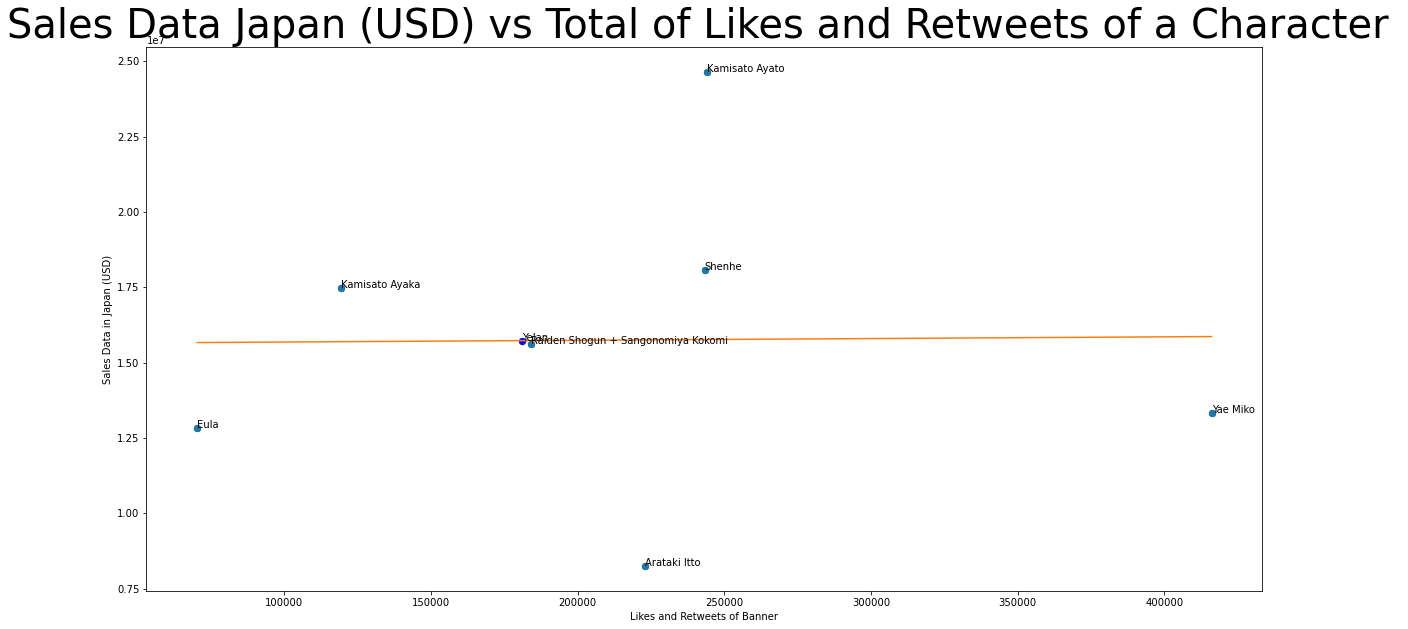

In [30]:
import numpy as np
import matplotlib.pyplot as plt
annotate = twitter2['Character'].values
x_data = twitter2['Post Activity'].values
y_data = sales_JP['Sales Japan (in USD)'].values
z = np.polyfit(x = x_data, y = y_data, deg=1)
f = np.poly1d(z)
x_new = np.linspace(x_data.min(), x_data.max(), 100)
y_new = f(x_new)
y_test = f(181184)
plt.figure(figsize = (20,10))
plt.plot(x_data, y_data,'o',x_new,y_new)
plt.scatter(x_data,y_data, s = 40, color = "green")
plt.scatter(181184, y_test, s = 40, color = "blue")
plt.xlabel("Likes and Retweets of Banner")
plt.ylabel("Sales Data in Japan (USD)")
plt.title("Sales Data Japan (USD) vs Total of Likes and Retweets of a Character ",fontsize=40)
for i, label in enumerate(annotate):
    plt.annotate(label, (x_data[i], y_data[i]))
plt.annotate('Yelan', (181184, y_test))
print(f(181184))
plt.show()

20285617.770686075


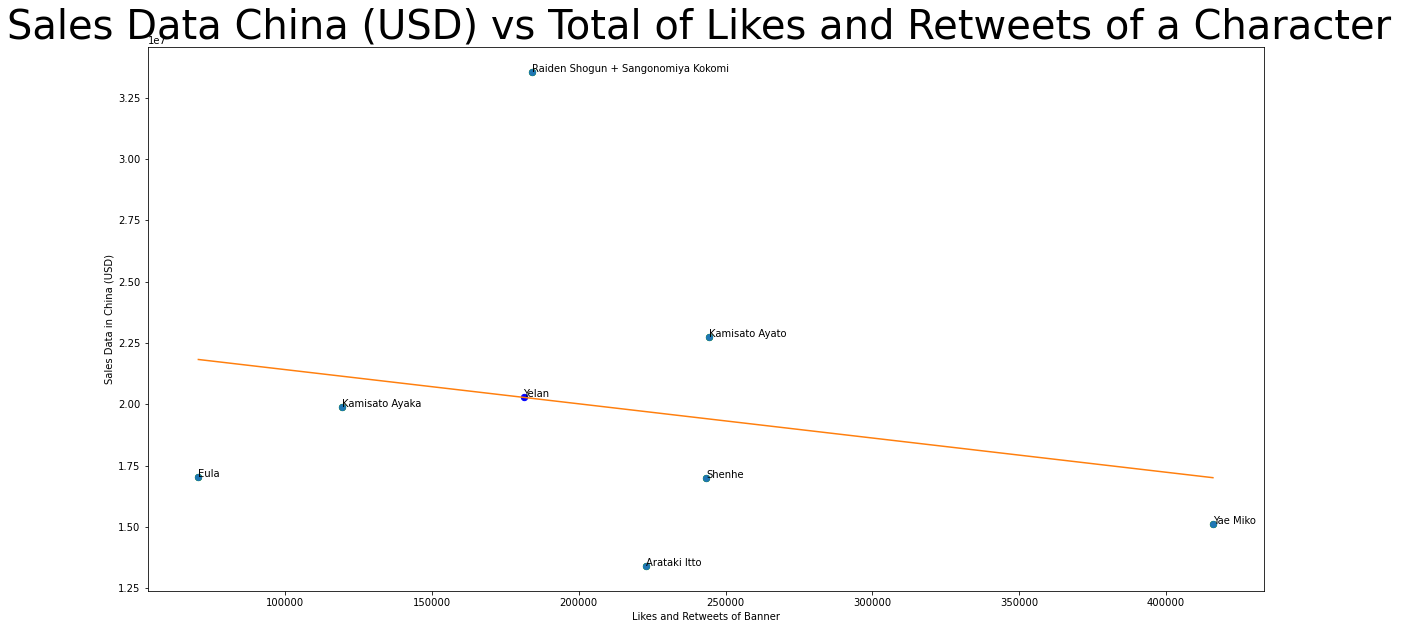

In [29]:
annotate = twitter2['Character'].values
x_data1 = twitter2['Post Activity'].values
y_data1 = sales_CN['Sales China iOS (in USD)'].values
z = np.polyfit(x = x_data1, y = y_data1, deg=1)
f = np.poly1d(z)
x_new = np.linspace(x_data1.min(), x_data1.max(), 100)
y_new = f(x_new)
y_test = f(181184)
plt.figure(figsize = (20,10))
plt.plot(x_data1, y_data1,'o',x_new,y_new)
plt.scatter(x_data1,y_data1, s = 40, color = "green")
plt.scatter(181184, y_test, s = 40, color = "blue")
plt.xlabel("Likes and Retweets of Banner")
plt.ylabel("Sales Data in China (USD)")
plt.title("Sales Data China (USD) vs Total of Likes and Retweets of a Character ",fontsize=40)
for i, label in enumerate(annotate):
    plt.annotate(label, (x_data1[i], y_data1[i]))
plt.annotate('Yelan', (181184, y_test))
print(f(181184))
plt.show()

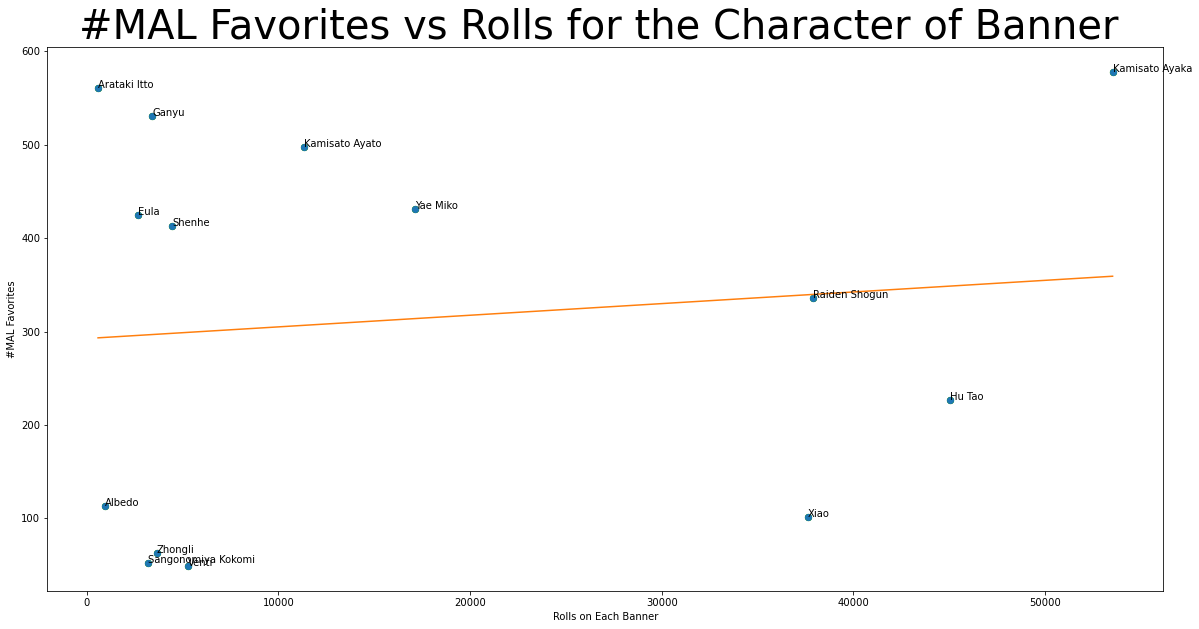

In [42]:
count1 = [227, 425, 113, 561, 413, 102, 63, 531, 431, 336, 52, 498, 49, 578]
df = pd.DataFrame(count1)
seiyuu_df['#MAL Favorites'] = seiyuu_df['#MAL Favorites'].astype(int)
annotations = seiyuu_df['Character'].to_numpy()
Y_Plots = df[0].to_numpy()
X_Plots = seiyuu_df['#MAL Favorites'].to_numpy()
z = np.polyfit(x = X_Plots, y = Y_Plots, deg=1)
f = np.poly1d(z)
x_new = np.linspace(X_Plots.min(), X_Plots.max(), 100)
y_new = f(x_new)
plt.figure(figsize = (20,10))
plt.plot(X_Plots, Y_Plots,'o',x_new,y_new)
plt.scatter(X_Plots,Y_Plots, s = 40, color = "green")

plt.xlabel("Rolls on Each Banner")
plt.ylabel("#MAL Favorites")
plt.title("#MAL Favorites vs Rolls for the Character of Banner ",fontsize=40)
for i, label in enumerate(annotations):
    plt.annotate(label, (X_Plots[i], Y_Plots[i]))
plt.show()